In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Importing dataset file

In [2]:
data = pd.read_csv(r"C:\Users\hm\Downloads\Project-Housing--2-\Project-Housing_splitted\train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
data.shape

(1168, 81)

In dataset, 1168 rows and 81 columns

In [4]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

There is missing value in LotFrontage column

In [6]:
data['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

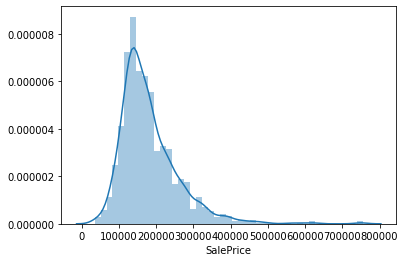

In [7]:
sns.distplot(data['SalePrice']);

In [8]:
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.953878
Kurtosis: 7.390657


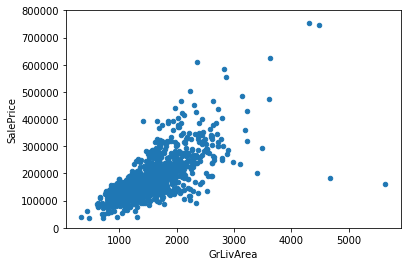

In [9]:
var = 'GrLivArea'
data1 = pd.concat([data['SalePrice'], data[var]], axis=1)
data1.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

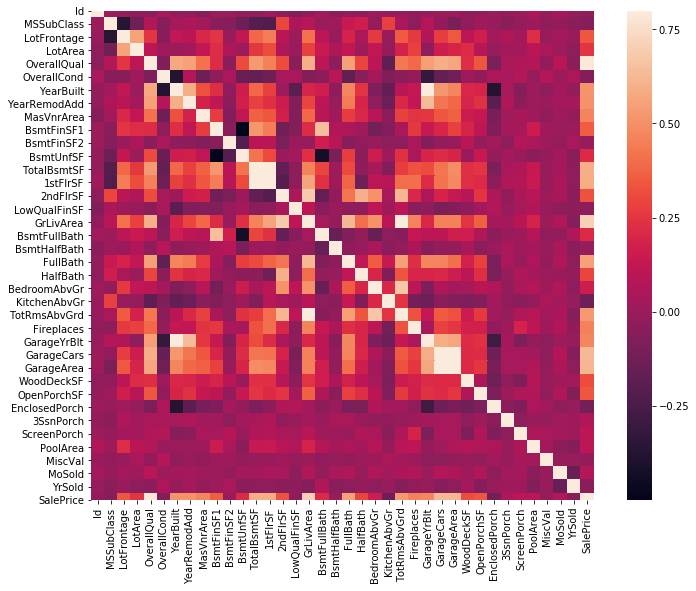

In [10]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

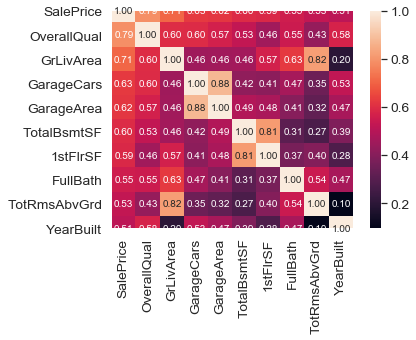

In [11]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

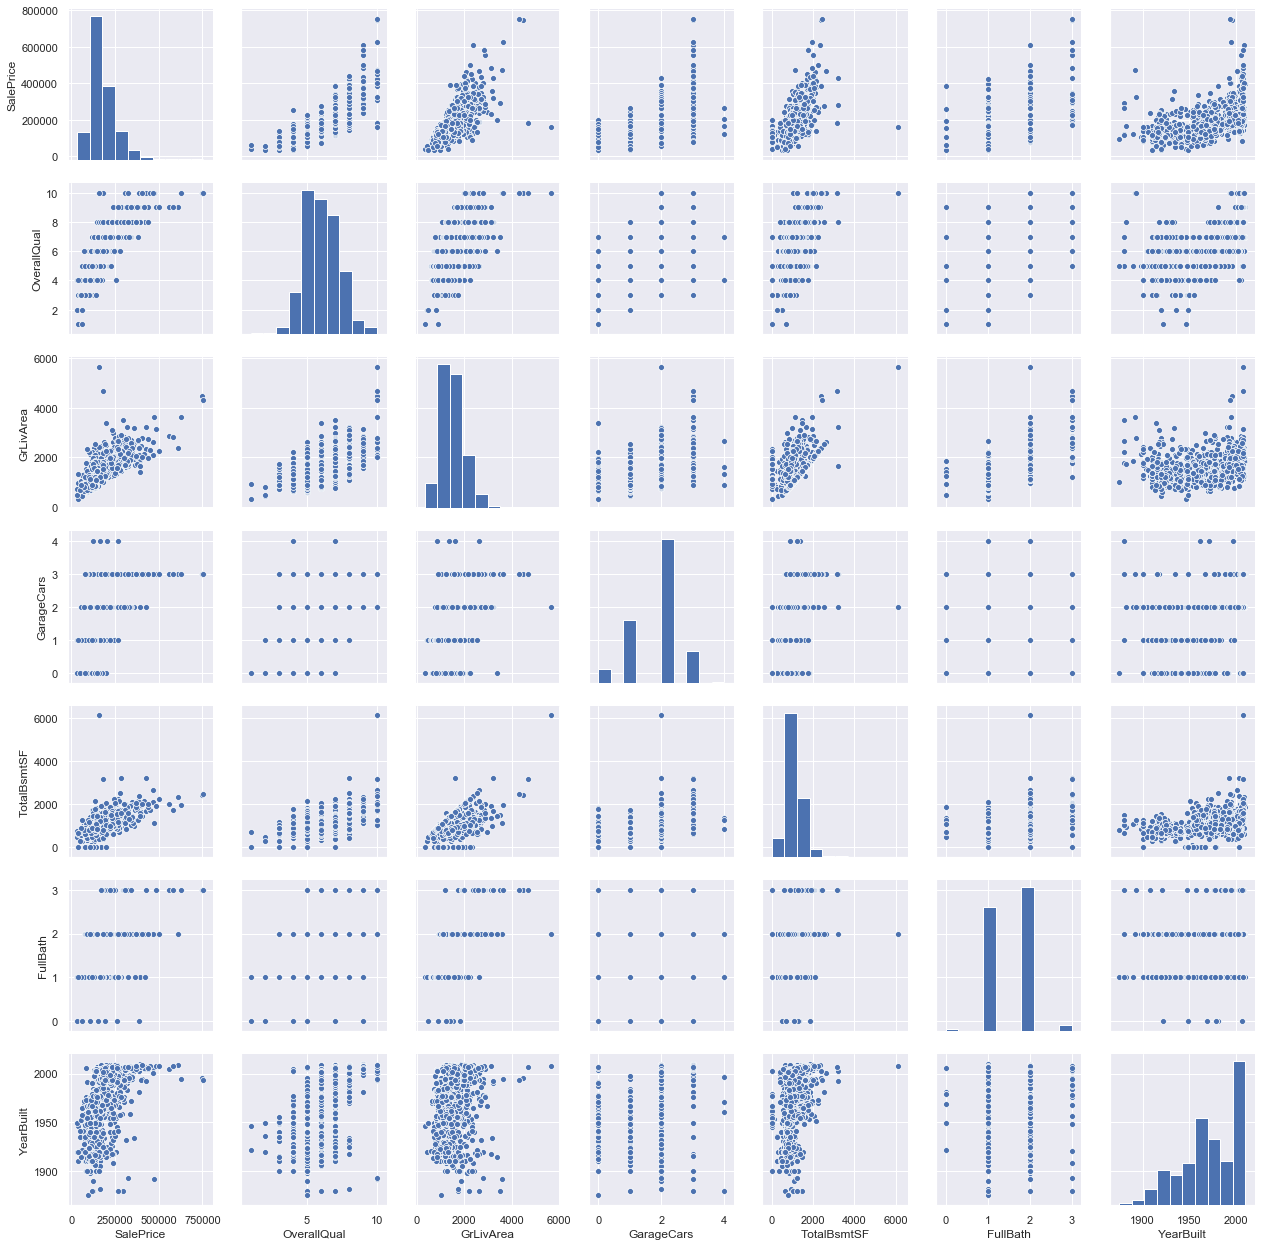

In [12]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [13]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1161,0.994007
MiscFeature,1124,0.962329
Alley,1091,0.934075
Fence,931,0.797089
FireplaceQu,551,0.471747
LotFrontage,214,0.183219
GarageType,64,0.054795
GarageCond,64,0.054795
GarageYrBlt,64,0.054795
GarageFinish,64,0.054795


In [14]:
#Action on missing data
data = data.drop((missing_data[missing_data['Total'] > 1]).index,1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)
data.isnull().sum().max() #just checking that there's no missing data missing...

0

# Univariate analysis

In [15]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(data['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.85372234]
 [-1.84852452]
 [-1.8157821 ]
 [-1.79807665]
 [-1.78922393]
 [-1.63746296]
 [-1.63113959]
 [-1.59952272]
 [-1.5869645 ]
 [-1.5552591 ]]

outer range (high) of the distribution:
[[3.60461374]
 [3.7121111 ]
 [3.83857857]
 [4.05151185]
 [4.74384538]
 [5.07711246]
 [5.44037762]
 [5.60912317]
 [7.12673283]
 [7.2532003 ]]


# Bivariate analysis

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


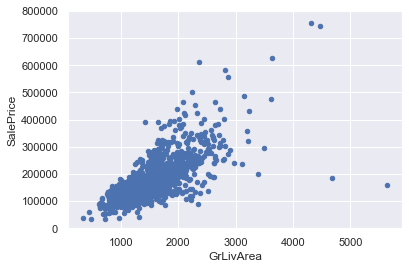

In [16]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([data['SalePrice'], data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [17]:
#deleting points
data.sort_values(by = 'GrLivArea', ascending = False)[:2]
data = data.drop(data[data['SalePrice'] == 260000].index)


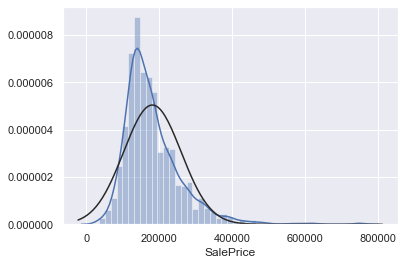

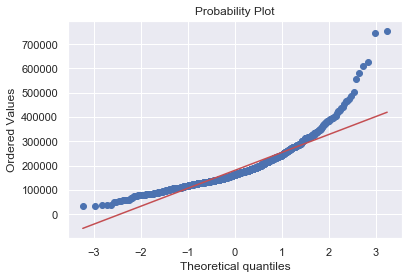

In [18]:
#histogram and normal probability plot
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

In [19]:
#applying log transformation
data['SalePrice'] = np.log(data['SalePrice'])

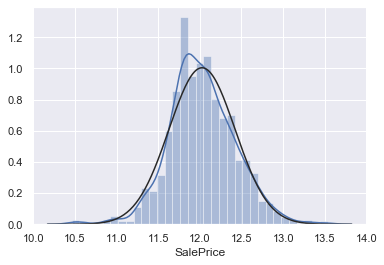

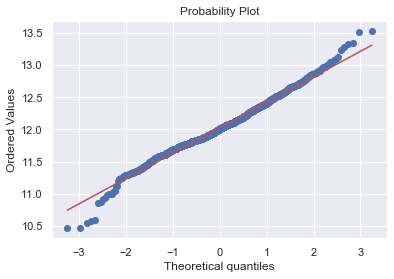

In [20]:
#transformed histogram and normal probability plot
sns.distplot(data['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

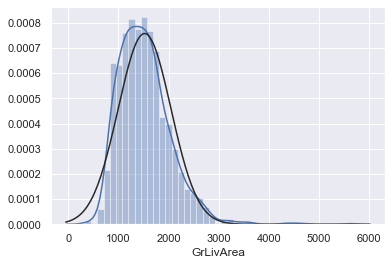

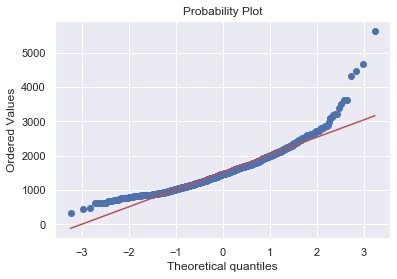

In [21]:
#histogram and normal probability plot
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

In [22]:
#data transformation
data['GrLivArea'] = np.log(data['GrLivArea'])

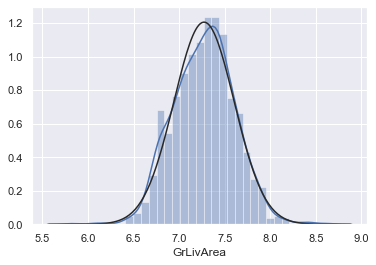

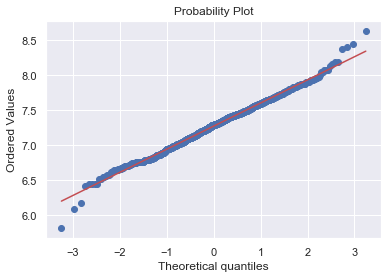

In [23]:
#transformed histogram and normal probability plot
sns.distplot(data['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['GrLivArea'], plot=plt)

Saving Model

In [25]:
from joblib import dump, load
dump(data, 'Housing.joblib')

['Housing.joblib']

# Conclusion

we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables.